# TP N°0 - Resolución

## Código Inicial

Para correr los demás ejercicios, primero se debe correr el siguiente código, que realiza imports necesarios y carga datos como los de los pokemons.

In [10]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import numpy as np
import matplotlib.pyplot as plt
import json

factory = PokemonFactory("pokemon.json")

with open("pokemon.json", "r") as f:
    contenu = json.load(f)


## Ejercicio 1.A

En este ejercicio, teniendo en cuenta las posibles combinaciones de pokemón y pokebola, se realizó cada tipo de captura posible 100 veces para saber de manera estimada la probabilidad de captura en cada escenario.

Probabilidad usando una pokeball:
- jolteon: 0.0617 ± 0.2406
- caterpie: 0.33 ± 0.4702
- snorlax: 0.0357 ± 0.1855
- onix: 0.0568 ± 0.2315
- mewtwo: 0.004 ± 0.0631
Probabilidad usando una ultraball:
- jolteon: 0.1209 ± 0.326
- caterpie: 0.6631 ± 0.4727
- snorlax: 0.0644 ± 0.2455
- onix: 0.1165 ± 0.3208
- mewtwo: 0.0072 ± 0.0845
Probabilidad usando una fastball:
- jolteon: 0.2449 ± 0.43
- caterpie: 0.3222 ± 0.4673
- snorlax: 0.0347 ± 0.183
- onix: 0.058 ± 0.2337
- mewtwo: 0.0136 ± 0.1158
Probabilidad usando una heavyball:
- jolteon: 0.0304 ± 0.1717
- caterpie: 0.3039 ± 0.4599
- snorlax: 0.0851 ± 0.279
- onix: 0.0862 ± 0.2807
- mewtwo: 0.0012 ± 0.0346


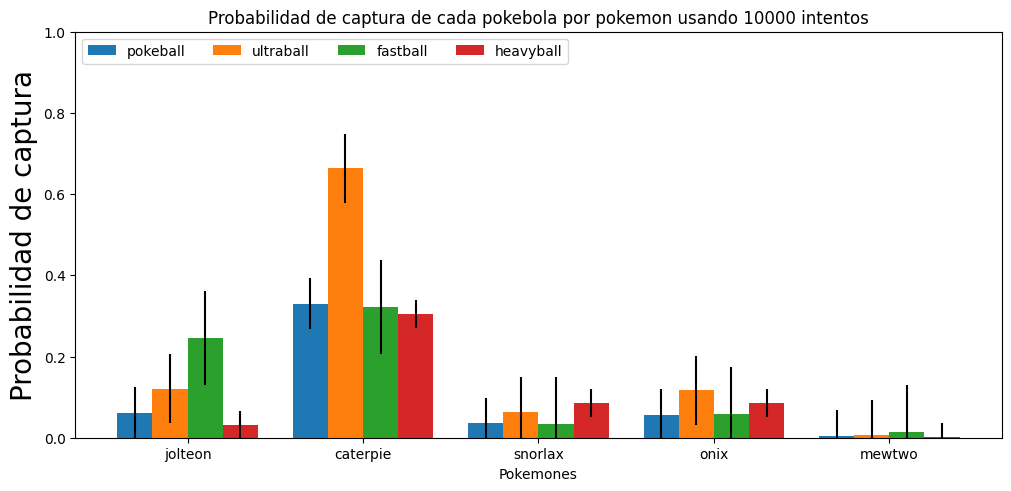

In [11]:
fig, ax = plt.subplots(layout='constrained')
pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]
fig.set_figwidth(10)

x = np.arange(len(contenu.keys()))  # the label locations
width = 0.2  # the width of the bars
multiplier = -0.5
catch_rate = {}

for j in pokeballs:
    print('Probabilidad usando una ' + j + ':')
    averages = []
    for key in contenu.keys():
        if not key in catch_rate:
            catch_rate[key] = {}
        pokemon = factory.create(key, 100, StatusEffect.NONE, 1)
        results = []
        for i in range(10000):
            value = attempt_catch(pokemon, j)
            results.append(value[0])
        mean_val = np.mean(results)
        std = np.std(results)
        catch_rate[key][j] = mean_val
        print('- ' + key + ':', mean_val, '±', std.round(4))
        averages.append(mean_val)
    offset = width * multiplier
    bar = ax.bar(x + offset, averages, width, yerr =std, label=j)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Probabilidad de captura', fontsize=20)
ax.set_xlabel('Pokemones')
ax.set_title('Probabilidad de captura de cada pokebola por pokemon usando 10000 intentos')
ax.set_xticks(x + width, contenu.keys())
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)

plt.show()
        

Para todos los tipos de captura se obtiene un estimado, menos para aquellas donde el pokemón capturado es Mewtwo, donde su probabilidad resulta cero en varios casos. Esto se debe a su igualmente baja probabilidad de captura, pero sí distinta de cero, por lo que de querer realizar un mejor análisis de la captura de este pokemón lo conveniente sería aumentar el tamaño de la muestra.

## Ejercicio 1.B

Como se puede observar en el gráfico anterior, las probabilidades de captura de tanto la pokeball como la ultraball tienen un comportamiento parecido en cada pokemón, donde la pokeball tiene una probabilidad base y la de la ultraball es de aproximadamente el doble que la anterior.

Sin embargo, en el caso de la fastball se observa una variación en su probabilidad con respecto al de una pokeball en un mismo pokemón, donde, por ejemplo, para Jolteon esta probabilidad es mayor que la de una pokeball aunque con una proporción variable, mientras que para Snorlax es de la misma magnitud que la pokeball mencionada. Esto mismo se observa también con la heavyball pero a la inversa, ya que Snorlax tiene casi una mayor probabilidad de captura en una heavyball con respecto a una pokeball, mientras que en Jolteon es la misma.

Por otro lado se encuentra Caterpie, cuyas probabilidades de captura con la fastball y heavyball son de la misma magnitud que una pokeball.

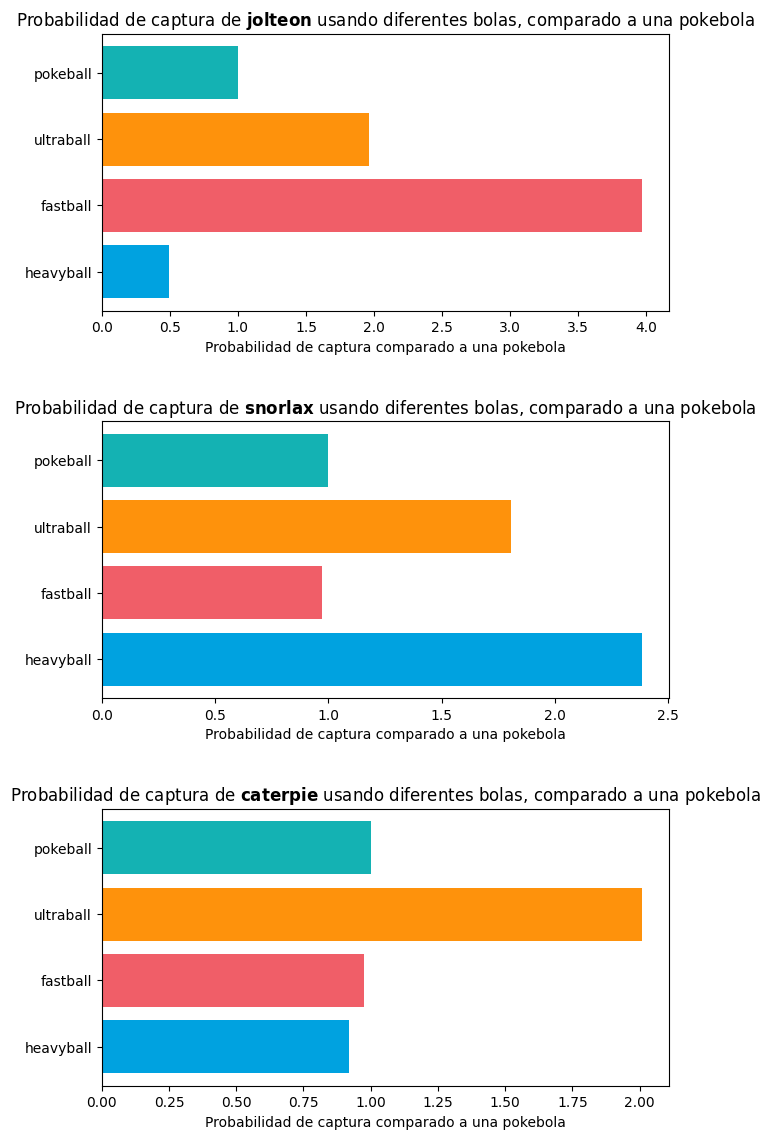

In [20]:
# Este código usa los resultados del ejercicio 1.A como datos base, por lo que
# se debe ejecutar dicho código antes de correr este

fig, ax = plt.subplots(3, 1)
fig.tight_layout()
fig.set_figheight(12)

pokemons = ['jolteon', 'snorlax', 'caterpie']
colors = ["#14b2b3", "#fe920c", "#f05e68", "#00a2e0"]
y = np.arange(len(pokeballs))
i = 0

for pokemon in pokemons:
    catches = []
    
    for pokeball in catch_rate[pokemon].keys():
        catches.append(catch_rate[pokemon][pokeball] / catch_rate[pokemon]['pokeball'])
    
    ax[i].barh(y, catches, color=colors, align='center')
    ax[i].set_yticks(y, labels=pokeballs)
    ax[i].invert_yaxis()
    ax[i].set_xlabel('Probabilidad de captura comparado a una pokebola')
    ax[i].set_title("Probabilidad de captura de " + r"$\bf{" + pokemon + "}$" + " usando diferentes bolas, comparado a una pokebola")
    i += 1


Luego, realizando una instrospección de las propiedades de cada pokemón, vemos una variación en los atributos de cada uno, pero las mayores son las de velicodad y peso, donde:

- Jolteon tiene una velocidad de **130** comparado a Snorlax que tiene 30 y Caterpie que tiene 45
- Snorlax tiene un peso de **1014.1**, mientras que Jolteon tiene 54 y Caterpie tiene 6.4

Por último, a nivel código encontramos que dichas propiedades **SÍ** afectan a la probabilidad de captura de cada pokemón, donde:

- Usando una _fastball_, los pokemons con velocidad >= 100 tienen una probabilidad 4 veces mayor de ser capturados en cada intento, comparado a una pokeball. Esto evidencia el aumento de probabilidades de captura de Jolteon usando una fastball.

```python
    # Posibilidad de captura de una Fastball
    def catch_rate(self):
        modifier = 1
        if self._catching_pkmn.stats.speed >= 100:
            modifier = 4
        return modifier * self._catching_pkmn.catch_rate
```

- Al usar una _heavyball_, los pokemons tienen mayor probabilidad de captura dependiendo del peso del pokemon, organizandolos en categorías. En el caso de Snorlax, vemos que se encuentra en la categoría superior, donde la probabilidad de captura en cada intento es **cuarenta** veces superior a la de una pokeball, mientras que Jolteon y Caterpie poseen pesos que no tienen modificador alguno en dicha probabilidad.

```python 
     #Posiblidad de captura de una Heavyball
    def catch_rate(self):
        modifier = -20
        if self._catching_pkmn.weight > 451.5:
            modifier = 20
        if self._catching_pkmn.weight > 677.3:
            modifier = 30
        if self._catching_pkmn.weight > 903:
            modifier = 40
            
        catch_rate = self._catching_pkmn.catch_rate + modifier
        return catch_rate if catch_rate > 0 else 1
```

Por último, merece mención el caso de Mewtwo, donde su velocidad es de 130 al igual que Jolteon y se puede apreciar cierto incremento de su probabilidad de captura en el gráfico del ejercicio 1.A, pero al tener una probabilidad de captura demasiado baja para poder ser analizada dado el tamaño de muestra usado (10000 tiradas), se decidió excluirlo del análisis.

## Ejercicio 2.A

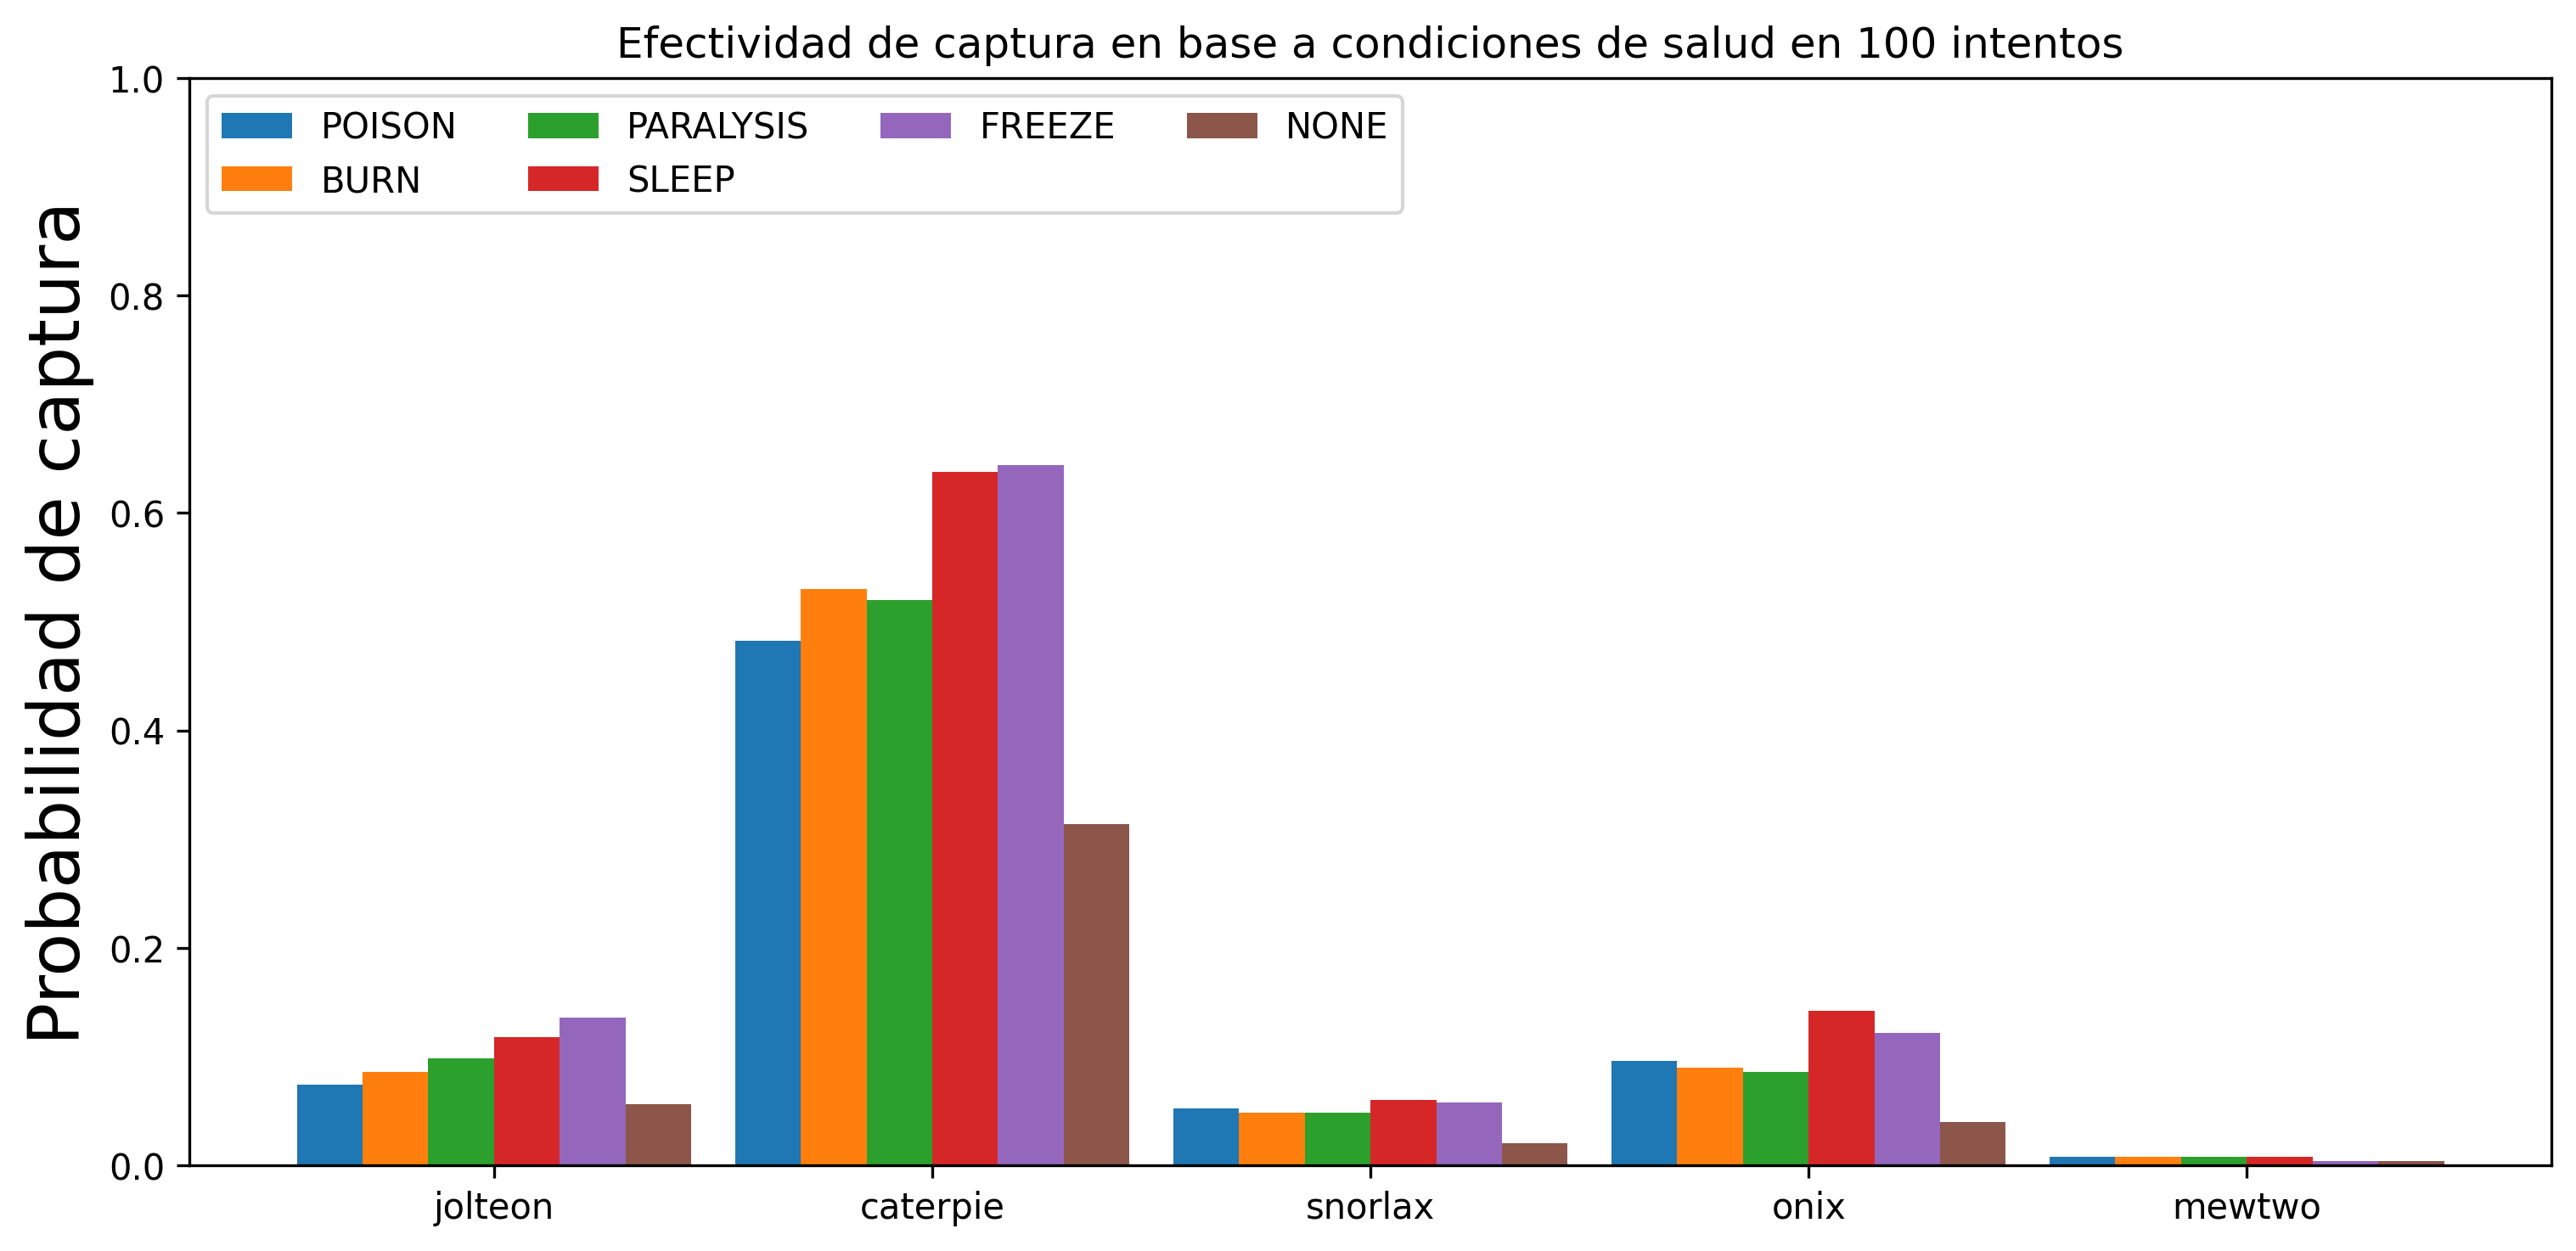

In [30]:
fig, ax = plt.subplots(layout='constrained', dpi=300)
fig.set_figwidth(10)
pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]

x = np.arange(len(contenu.keys()))  # the label locations
width = 0.15  # the width of the bars
multiplier = -1.5

for j in StatusEffect:
    averages = []
    for key in contenu.keys():
        pokemon = factory.create(key, 100, j, 1)
        results = []
        for i in range(500):
            value = attempt_catch(pokemon, "pokeball")
            results.append(value[0])
        
        averages.append(np.mean(results))
    offset = width * multiplier
    bar = ax.bar(x + offset, averages, width, label=j.name)
    # ax.bar_label(bar, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Probabilidad de captura', fontsize=20)
ax.set_title('Efectividad de captura en base a condiciones de salud en 100 intentos')
ax.set_xticks(x + width, contenu.keys())
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)

plt.show() 

Si, las condiciones de salud afectan la efectividad de la captura. Se analiza la captura con pokeballs y el porcentaje de captura es considerablemente mayor cuando los Pokémones están afectados por un estado o condición de salud. Las condiciones más efectivas son SLEEP Y FREEZE. Comparando con el grafico anterior se puede notar el doble de efectividad. 

## Ejercicio 2.B

Para las mediciones de captura en este ejercicio se usarán los pokemones **Jolteon** y **Snorlax**, a los cuales se les realizará una variación de sus puntos de vida para observar cómo influye dicho parámetro en sus probabilidades de captura.

Por ello, los demás parámetros se mantendrán constantes, siendo:
- Pokebola: _Pokeball_
- Nivel: _100_
- Estado: _NONE_

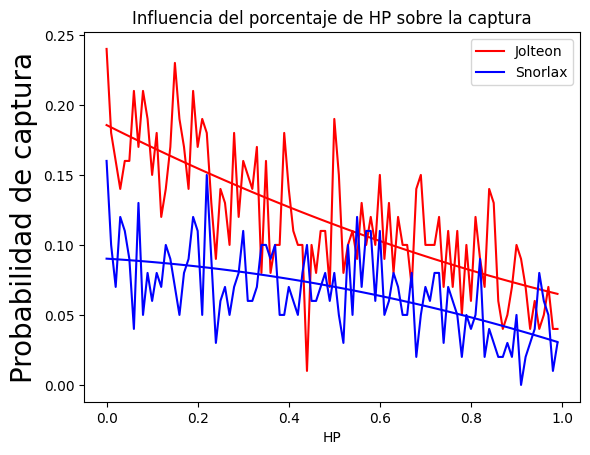

In [29]:
meanssnorlax=[]
meansjolteon=[]
HP=np.arange(0,1,0.01)

for i in HP:
    pokemon = factory.create("snorlax", 100, StatusEffect.NONE, i)
    results = []
    for j in range(100):
        value = attempt_catch(pokemon, "pokeball")
        results.append(value[0])
    average = np.count_nonzero(results)/len(results)
    meanssnorlax.append(average)
for i in HP:
    pokemon = factory.create("jolteon", 100, StatusEffect.NONE, i)
    results = []
    for j in range(100):
        value = attempt_catch(pokemon, "pokeball")
        results.append(value[0])
    average = np.count_nonzero(results)/len(results)
    meansjolteon.append(average)

plt.plot(HP,meansjolteon, label='Jolteon',color='red')
coefficients = np.polyfit(HP,meansjolteon, 2)
polynomial = np.poly1d(coefficients)
plt.plot(HP,polynomial(HP),color='red')
plt.plot(HP,meanssnorlax, label='Snorlax',color='blue')
coefficientssnorlax = np.polyfit(HP,meanssnorlax, 2)
polynomialsnorlax = np.poly1d(coefficientssnorlax)
plt.plot(HP,polynomialsnorlax(HP),color='blue')
plt.title('Influencia del porcentaje de HP sobre la captura')
plt.legend()
plt.xlabel('HP')
plt.ylabel('Probabilidad de captura', fontsize=20)
plt.show()

Como se puede observar en el gráfico, hay un aumento en las probabilidades de captura de tanto **Jolteon** como **Snorlax** a medida que se reduce el HP de dichos pokemones. Esto puede generarlizarle a los demas pokemones, ya que al revisar una introspección del código utilizado para la captura encontramos que al disminuir los puntos de vida actuales de un pokemon aumentan las probabilidades de captura.

```python
def attempt_catch(
    pokemon: Pokemon, pokeball_type: str, noise=0.0
) -> Tuple[bool, float]:
    
    ...

    max_hp = pokemon.max_hp
    curr_hp = pokemon.current_hp
    catch_rate = pokeball.catch_rate
    ball_rate = pokeball.ball_rate

    # Get the property value from the enum, value[0] would be the name
    status = pokemon.status_effect.value[1]

    numerator = 1 + (max_hp * 3 - curr_hp * 2) * catch_rate * ball_rate * status
    denominator = max_hp * 3

    ...

    # El parámetro noise_multiplier es 1 al no usarse ruido en las pruebas realizadas
    capture_rate = round((numerator / denominator) / 256, 4) * noise_multiplier
    if (capture_rate > 1):
        capture_rate = 1

    return (random.uniform(0, 1) < capture_rate, capture_rate)
```

## Ejercicio 2.C
Analizando los resultados de los puntos anteriores (2.A y 2.B) se puede observar que las condiciones de salud más efectivas son **FREEZE** y **SLEEP**. A su vez, se puede observar que si el porcentaje de HP es menor la probabilidad de captura es mayor. El nivel del Pokémon no muestra influencia significativa sobre la probabilidad de captura.
Por lo tanto, se puede concluir que los parámetros que más afectan las probabilidades de captura son las condiciones de salud y el porcentaje de vida.

## Ejercicio 2.D

Como se vio en los ítems anteriores, la elección de un tipo de pokebola y condición del pokemón a capturar influyen en la probabilidad final de captura de dicho pokemón. Por ello, usando a **Jolteon** y **Snorlax** como ejemplos, se procede a analizar la mejor combinación posible en cada caso.

**NOTA:** A fines de aumentar la consistencia de los resultados obtenidos, en este ejercicio se usa la probabilidad de capturar cada pokemón en vez de obtener un estimado luego de _N_ tiradas.

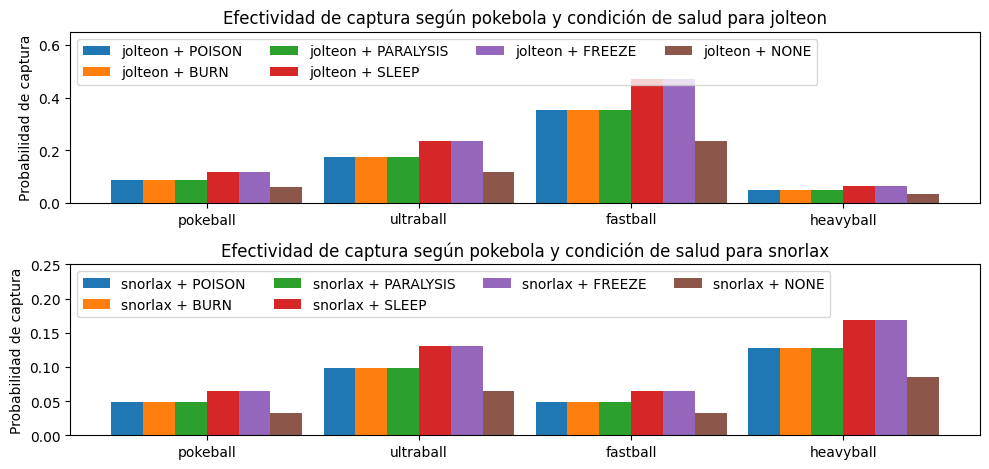

In [31]:
fig, ax = plt.subplots(2, layout='tight')
fig.set_figwidth(10)
pokeballs = ['pokeball', 'ultraball', 'fastball', 'heavyball']
pokemons = ['jolteon', 'snorlax']

x = np.arange(len(pokeballs))  # the label locations
width = 0.15  # the width of the bars
i = 0

for pokemon in pokemons:
    multiplier = -1.5
    catches = {}
    for j in StatusEffect:
        aux_poke = factory.create(pokemon, 100, j, 1)
        catches[j] = {}
        for pokeball in pokeballs:
            catch_rate = attempt_catch(aux_poke, pokeball)[1]
            catches[j][pokeball] = catch_rate
        offset = width * multiplier
        bar = ax[i].bar(x + offset, catches[j].values(), width, label='{} + {}'.format(pokemon, j.name))
        # ax.bar_label(bar, padding=3)
        multiplier += 1
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[i].set_ylabel('Probabilidad de captura')
    ax[i].set_title('Efectividad de captura según pokebola y condición de salud para {}'.format(pokemon))
    ax[i].set_xticks(x + width, pokeballs)
    ax[i].legend(loc='upper left', ncols=4)
    if i == 0:
        y_lim = 0.65
    else:
        y_lim = 0.25
    ax[i].set_ylim(0, y_lim)
    i += 1

plt.show()

Así, se puede observar que:
| Pokemón\Combinación | Mejor combinación | Peor combinación |
| ------------------- | ----------------- | ---------------- |
| Jolteon | Fastball + SLEEP/FREEZE | Heavyball + NONE |
| Snorlax | Heavyball + SLEEP/FREEZE | Pokeball/Fastball + NONE |

## Ejercicio 2.E

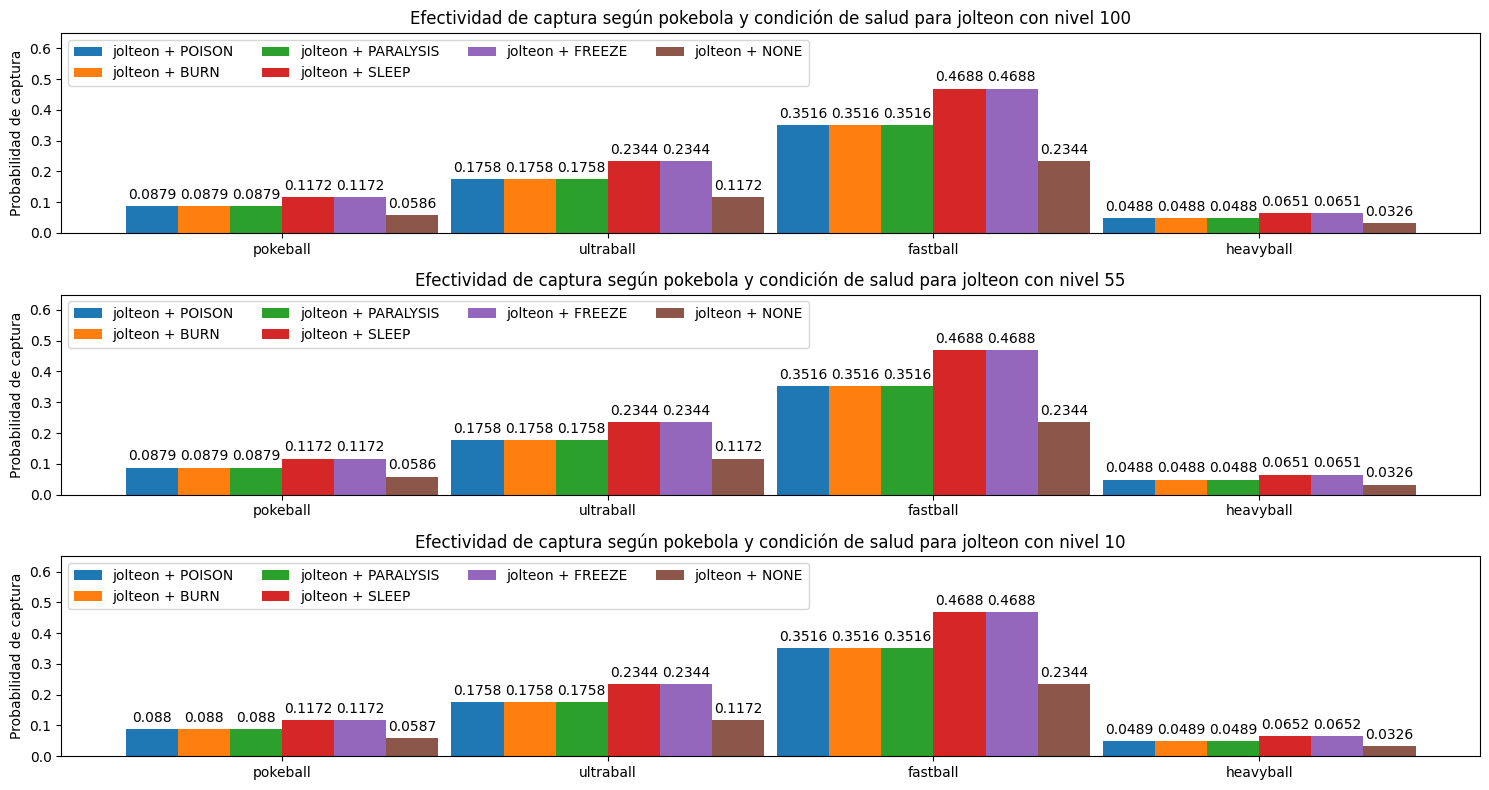

In [32]:
fig, ax = plt.subplots(3, layout='tight')
fig.set_figwidth(15)
fig.set_figheight(8)
pokeballs = ['pokeball', 'ultraball', 'fastball', 'heavyball']
pokemons = ['jolteon', 'jolteon', 'jolteon']

x = np.arange(len(pokeballs))  # the label locations
width = 0.16  # the width of the bars
i = 0
level = 100

for pokemon in pokemons:
    multiplier = -1.5
    catches = {}
    for j in StatusEffect:
        aux_poke = factory.create(pokemon, level, j, 1)
        catches[j] = {}
        for pokeball in pokeballs:
            catch_rate = attempt_catch(aux_poke, pokeball)[1]
            catches[j][pokeball] = catch_rate
            #print(catches[j].values())
        offset = width * multiplier
        bar = ax[i].bar(x + offset, catches[j].values(), width, label='{} + {}'.format(pokemon, j.name))
        ax[i].bar_label(bar, padding=3)
        multiplier += 1
    level -= 45
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[i].set_ylabel('Probabilidad de captura')
    ax[i].set_title('Efectividad de captura según pokebola y condición de salud para {} con nivel {}'.format(pokemon, aux_poke.level))
    ax[i].set_xticks(x + width, pokeballs)
    ax[i].legend(loc='upper left', ncols=4)
    ax[i].set_ylim(0, 0.65)
    i += 1

plt.show()

Observando los gráficos se puede apreciar que al disminuir el nivel del Pokémon la probabilidad de captura no varía, o si varía no representa un valor significativo.